# The Majority Illusion 

**Author:** Sebastian Ahumada  
**Date:** October 2022 

**Description:**

The objective of this notebook is to perform an exercise on the majority illusion, which is a phenomenon studied in the field of network science. The notebook consists of two parts:
1) In the first part, the goal is to recreate what was done in the following paper: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0147617
2) In the second part, the goal is to provide an alternative way to study the majority illusion.

To achieve the described objectives, we will work with the networkx library.

# Import Libraries

In [5]:
import random
from random import randrange
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import powerlaw_sequence
import pandas as pd
from numpy.core.numeric import zeros_like
# from networkx.algorithms.operators.all import zip_longest
from networkx.algorithms.community.centrality import girvan_newman
import time
from networkx.generators.atlas import graph_atlas_g

/var/folders/p9/r113yjn147x6xb5hqyxkzps80000gn/T/ipykernel_23769/2598539725.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric.zeros_like.
  from numpy.core.numeric import zeros_like


In [7]:
mostrar = 0

# Part 1: Re-create paper experiment

### Define Functions

In [ ]:
def scale_free_network(nodes,exponent,P,display):
  attr = {0: 0, 1: 1}

  k_list = []
  pk_list = []
  z = powerlaw_sequence(nodes, exponent = exponent) #sequence
  z = [round(item) for item in z]
  verify = nx.is_graphical(z)

  while verify == False:
    z = powerlaw_sequence(nodes, exponent = exponent)
    z = [round(item) for item in z]
    verify = nx.is_graphical(z)

  seed = 1000

  #print("Configuration model")
  G = nx.configuration_model(z, seed=seed)  # configuration model, seed for reproduciblity

  for i in range(0,nx.number_of_nodes(G)):
    if random.random() < P:
      a = 1
    else:
      a = 0
    G.add_nodes_from([(i, {"attr":a})])
  
  degree_sequence = sorted((d for n, d in G.degree()), reverse=True) # degree sequence
  #print(f"Degree sequence {degree_sequence}")
  #print("Degree histogram")
  hist = {}
  for d in degree_sequence:
      if d in hist:
          hist[d] += 1
      else:
          hist[d] = 1
  #print("degree #nodes")
  for d in hist:
      #print(f"{d:4} {hist[d]:6}")
      pk_list.append(hist[d])
      k_list.append(d)
  
  if display == 'graph':
    out = G
  elif display == 'k_list':
    out = k_list
  elif display == 'pk_list':
    out = pk_list

  return out

In [ ]:
def prob_of_majority(G):
  neighbor_list = []
  prob_majority = []
  for node in G.nodes:
    #print("Node:", node)
    neighbor_list = []
    for neighbor in G.neighbors(node):
        #print("Neighbor Attr:", G.nodes[neighbor]["attr"])
        neighbor_list.append(G.nodes[neighbor]["attr"])

    if len(neighbor_list) == 0:
      pom = 0
    else:
      pom = neighbor_list.count(1)/len(neighbor_list)
    prob_majority.append(pom)

  cont = 0
  for i in prob_majority:
    if i > 0.5:
      cont = cont +1

  prob_of_majority = cont/G.number_of_nodes()
  return prob_of_majority

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

def std(lst):
  lst = pd.DataFrame(lst)
  std = lst[0].std()
  return std

In [ ]:
### Degrees of all nodes
def degrees_all_nodes(G,display):
  degrees_all_nodes = []
  for node in G.nodes:
    if mostrar == 1:
      print(f"Degree({node}) = {G.degree(node)}")
    degrees_all_nodes.append(G.degree(node))

  #print("All nodes")
  #print("Average:", Average(degrees_all_nodes))
  #print("STD:", std(degrees_all_nodes))
  k = Average(degrees_all_nodes)
  stdk = std(degrees_all_nodes)
  if display == 'stdk':
    out = stdk
    #print("STD Degree:",stdk)
  elif display == 'k':
    out = k
    #print("Average Degree:", out)
  elif display == 'list':
    out = degrees_all_nodes
    #print("Degrees all nodes", out)
  return out

### Degrees of active nodes
def degrees_active_nodes(G,display):
  degrees_active_nodes = []
  for node in active_nodes:
    if mostrar == 1:
      print(f"Degree({node}) = {G.degree(node)}")
    degrees_active_nodes.append(G.degree(node))

  #print("Active Nodes")
  #print("Average:", Average(degrees_active_nodes))
  #print("STD:", std(degrees_active_nodes))
  k1 = Average(degrees_active_nodes)
  if display == 'list':
    out = degrees_active_nodes
  else:
    out = k1
  return out

### Degrees of Inactive nodes
def degrees_inactive_nodes(G,display):
  degrees_inactive_nodes = []
  for node in inactive_nodes:
    if mostrar == 1:
      print(f"Degree({node}) = {G.degree(node)}")
    degrees_inactive_nodes.append(G.degree(node))

  #print("Inactive Nodes")
  #print("Average:", Average(degrees_inactive_nodes))
  #print("STD:", std(degrees_inactive_nodes))
  k0 = Average(degrees_inactive_nodes)
  if display == 'list':
    out = degrees_inactive_nodes
  else:
    out = k0
  return out

### Attributes of all nodes
def attributes_all_nodes(G,display):
  attributes = []
  attributes = list(nx.get_node_attributes(G, 'attr').values())

  #print("Attributes")
  #print("Average:", Average(attributes))
  #print("STD:", std(attributes))
  stdx = std(attributes)
  if display == 'list':
    out = attributes
  else:
    out = stdx
  return out

In [ ]:
### Eje X
def Pkx(P,G):
  stdk = degrees_all_nodes(G,'stdk')
  stdx = attributes_all_nodes(G,'stdx')
  k1 = degrees_active_nodes(G,'k1')
  k = stdk = degrees_all_nodes(G,'k')
  pkx = (P/(stdx*stdk)) * (k1-k)
  return pkx

In [ ]:
def scale_free_net(nodes,exponent,P,pearson,max):
  rkk = -1
  while rkk < max:
    G = scale_free_network(nodes,exponent,P,'graph')
    rkk = nx.degree_pearson_correlation_coefficient(G)
  cont = 0
  while cont == 0:
    G = nx.double_edge_swap(G, nswap=1, max_tries=10000, seed=None)
    rkk = nx.degree_pearson_correlation_coefficient(G)

    lower = pearson - 0.005
    upper = pearson + 0.005
    if lower <= rkk <= upper:
      cont = 1
    else:
      cont = 0
  return G

### Scale Free Network graph

In [ ]:
a = 2.1

if a == 2.1:
  list_rkk_chosee = [-0.05,-0.15,-0.25,-0.35]
  max = 0
  df1 = pd.DataFrame()
elif a == 2.4:
  list_rkk_chosee = [0.2,0.10,0,-0.10,-0.20]
  max = 0.21
  df2 = pd.DataFrame()
elif a == 3.1:
  list_rkk_chosee = [0.20,0,0,-0.05,-0.15]
  max = 0.21
  df3 = pd.DataFrame()

rkk = -1000


while rkk < max:
  graph = scale_free_network(100,a,0.1,'graph')
  rkk = nx.degree_pearson_correlation_coefficient(graph)
  #rkk = nx.degree_assortativity_coefficient(graph)
  #print(rkk)

for i in list_rkk_chosee:
  G =  graph.copy()
  cont = 0
  while cont == 0:
    G = nx.double_edge_swap(G, nswap=1, max_tries=10000, seed=None)
    rkk = nx.degree_pearson_correlation_coefficient(G)
    #rkk = nx.degree_assortativity_coefficient(G)

    lower = i - 0.005
    upper = i + 0.005
    if lower <= rkk <= upper:
      print("Alpha:", a)
      print("Dissortative measure:", round(rkk,2))
      cont = 1
    else:
      cont = 0

  
  list_rkk = [] #round(rkk,2)
  list_prob_maj = []
  list_correlation_KX = []

  inactive_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 0]
  for i in range(0,len(inactive_nodes)):
    active_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 1]
    inactive_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 0]

    degrees_list_active_nodes = degrees_active_nodes(G,'list')
    degrees_list_inactive_nodes = degrees_inactive_nodes(G,'list')

    random_pos = random.randrange(len(active_nodes))
    active_node_changed = active_nodes[random_pos]
    rnd_active_node_degree = degrees_list_active_nodes[random_pos]


    if rnd_active_node_degree < degrees_list_inactive_nodes[i]:
      #print("Active->Inactive Node:", active_node_changed, "Active Degree:", rnd_active_node_degree ,"Inactive->Active Node:", inactive_nodes[i],"Inactive Degree", degrees_list_inactive_nodes[i])
      nx.set_node_attributes(G, {inactive_nodes[i]:{'attr':1}})
      nx.set_node_attributes(G, {active_nodes[random_pos]:{'attr':0}})
      rkk = nx.degree_assortativity_coefficient(G)
      prob_maj = prob_of_majority(G)
      correlation_KX = Pkx(0.1,G) 
      active_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 1]
      print("Active nodes", len(active_nodes), "rkk:", round(rkk,2), "Prob Majority:", prob_maj, "correlation_KX", correlation_KX)
      list_rkk.append(round(rkk,2)) #round(rkk,2)
      list_prob_maj.append(prob_maj)
      list_correlation_KX.append(correlation_KX)

  if a == 2.1:
    df_aux1 = pd.DataFrame()
    df_aux1['correlation_KX'] = list_correlation_KX
    df_aux1['prob_majority'] = list_prob_maj
    df_aux1['rkk'] = list_rkk
    df1 = pd.concat([df1, df_aux1], ignore_index=True, axis = 0)
    out = df1
  elif a == 2.4:
    df_aux2 = pd.DataFrame()
    df_aux2['correlation_KX'] = list_correlation_KX
    df_aux2['prob_majority'] = list_prob_maj
    df_aux2['rkk'] = list_rkk
    df2 = pd.concat([df2, df_aux2], ignore_index=True, axis = 0)
    out = df2
  elif a == 3.1:
    df_aux3 = pd.DataFrame()
    df_aux3['correlation_KX'] = list_correlation_KX
    df_aux3['prob_majority'] = list_prob_maj
    df_aux3['rkk'] = list_rkk
    df3 = pd.concat([df3, df_aux3], ignore_index=True, axis = 0)
    out = df3

Alpha: 2.1
Dissortative measure: -0.05
Active nodes 12 rkk: -0.05 Prob Majority: 0.01 correlation_KX -0.05103103630798288
Active nodes 12 rkk: -0.05 Prob Majority: 0.01 correlation_KX -0.03969080601732002
Active nodes 12 rkk: -0.05 Prob Majority: 0.03 correlation_KX -0.034020690871988585
Active nodes 12 rkk: -0.05 Prob Majority: 0.09 correlation_KX 0.022680460581325702
Active nodes 12 rkk: -0.05 Prob Majority: 0.13 correlation_KX 0.24381495124925157
Active nodes 12 rkk: -0.05 Prob Majority: 0.15 correlation_KX 0.2778356421212401
Active nodes 12 rkk: -0.05 Prob Majority: 0.14 correlation_KX 0.30618621784789724
Active nodes 12 rkk: -0.05 Prob Majority: 0.15 correlation_KX 0.31752644813856007
Active nodes 12 rkk: -0.05 Prob Majority: 0.15 correlation_KX 0.32319656328389157
Active nodes 12 rkk: -0.05 Prob Majority: 0.14 correlation_KX 0.3572172541558801
Active nodes 12 rkk: -0.05 Prob Majority: 0.16 correlation_KX 0.3628873693012116
Active nodes 12 rkk: -0.05 Prob Majority: 0.21 correlatio

In [ ]:
a = 2.4
timeout = time.time() + 60 # 1 minute from now

if a == 2.1:
  list_rkk_chosee = [-0.05,-0.15,-0.25,-0.35]
  max = 0
  df1 = pd.DataFrame()
elif a == 2.4:
  list_rkk_chosee = [0.2,0.10,0,-0.10,-0.20]
  max = 0.21
  df2 = pd.DataFrame()
elif a == 3.1:
  list_rkk_chosee = [0.20,0,0,-0.05,-0.15]
  max = 0.21
  df3 = pd.DataFrame()

rkk = -1000


while rkk < max:
  graph = scale_free_network(100,a,0.1,'graph')
  rkk = nx.degree_pearson_correlation_coefficient(graph)
  #rkk = nx.degree_assortativity_coefficient(graph)
  #print(rkk)

for i in list_rkk_chosee:
  G =  graph.copy()
  cont = 0
  while cont == 0 or time.time() > timeout:
    G = nx.double_edge_swap(G, nswap=1, max_tries=10000, seed=None)
    rkk = nx.degree_pearson_correlation_coefficient(G)
    #rkk = nx.degree_assortativity_coefficient(G)

    lower = i - 0.005
    upper = i + 0.005
    if lower <= rkk <= upper:
      print("Alpha:", a)
      print("Dissortative measure:", round(rkk,2))
      cont = 1
    else:
      cont = 0

  
  list_rkk = [] #round(rkk,2)
  list_prob_maj = []
  list_correlation_KX = []

  inactive_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 0]
  for i in range(0,len(inactive_nodes)):
    active_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 1]
    inactive_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 0]

    degrees_list_active_nodes = degrees_active_nodes(G,'list')
    degrees_list_inactive_nodes = degrees_inactive_nodes(G,'list')

    random_pos = random.randrange(len(active_nodes))
    active_node_changed = active_nodes[random_pos]
    rnd_active_node_degree = degrees_list_active_nodes[random_pos]


    if rnd_active_node_degree < degrees_list_inactive_nodes[i]:
      #print("Active->Inactive Node:", active_node_changed, "Active Degree:", rnd_active_node_degree ,"Inactive->Active Node:", inactive_nodes[i],"Inactive Degree", degrees_list_inactive_nodes[i])
      nx.set_node_attributes(G, {inactive_nodes[i]:{'attr':1}})
      nx.set_node_attributes(G, {active_nodes[random_pos]:{'attr':0}})
      rkk = nx.degree_assortativity_coefficient(G)
      prob_maj = prob_of_majority(G)
      correlation_KX = Pkx(0.1,G) 
      active_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 1]
      print("Active nodes", len(active_nodes), "rkk:", round(rkk,2), "Prob Majority:", prob_maj, "correlation_KX", correlation_KX)
      list_rkk.append(round(rkk,2)) #round(rkk,2)
      list_prob_maj.append(prob_maj)
      list_correlation_KX.append(correlation_KX)

  if a == 2.1:
    df_aux1 = pd.DataFrame()
    df_aux1['correlation_KX'] = list_correlation_KX
    df_aux1['prob_majority'] = list_prob_maj
    df_aux1['rkk'] = list_rkk
    df1 = pd.concat([df1, df_aux1], ignore_index=True, axis = 0)
    out = df1
  elif a == 2.4:
    df_aux2 = pd.DataFrame()
    df_aux2['correlation_KX'] = list_correlation_KX
    df_aux2['prob_majority'] = list_prob_maj
    df_aux2['rkk'] = list_rkk
    df2 = pd.concat([df2, df_aux2], ignore_index=True, axis = 0)
    out = df2
  elif a == 3.1:
    df_aux3 = pd.DataFrame()
    df_aux3['correlation_KX'] = list_correlation_KX
    df_aux3['prob_majority'] = list_prob_maj
    df_aux3['rkk'] = list_rkk
    df3 = pd.concat([df3, df_aux3], ignore_index=True, axis = 0)
    out = df3

Alpha: 2.4
Dissortative measure: 0.2
Active nodes 12 rkk: 0.2 Prob Majority: 0.08 correlation_KX 0.2357362916174077
Active nodes 12 rkk: 0.2 Prob Majority: 0.09 correlation_KX 0.2808965007395164
Active nodes 12 rkk: 0.2 Prob Majority: 0.09 correlation_KX 0.29218655302004365
Active nodes 12 rkk: 0.2 Prob Majority: 0.11 correlation_KX 0.33734676214215237
Active nodes 12 rkk: 0.2 Prob Majority: 0.12 correlation_KX 0.3825069712642611
Active nodes 12 rkk: 0.2 Prob Majority: 0.12 correlation_KX 0.43895723266689707
Active nodes 12 rkk: 0.2 Prob Majority: 0.12 correlation_KX 0.4615373372279515
Active nodes 12 rkk: 0.2 Prob Majority: 0.15 correlation_KX 0.48411744178900573
Active nodes 12 rkk: 0.2 Prob Majority: 0.18 correlation_KX 0.5292776509111146
Alpha: 2.4
Dissortative measure: 0.1
Active nodes 12 rkk: 0.1 Prob Majority: 0.1 correlation_KX 0.2357362916174077
Active nodes 12 rkk: 0.1 Prob Majority: 0.1 correlation_KX 0.29218655302004365
Active nodes 12 rkk: 0.1 Prob Majority: 0.11 correlati

In [ ]:
a = 3.1
timeout = time.time() + 60 # 1 minute from now

if a == 2.1:
  list_rkk_chosee = [-0.05,-0.15,-0.25,-0.35]
  max = 0
  df1 = pd.DataFrame()
elif a == 2.4:
  list_rkk_chosee = [0.2,0.10,0,-0.10,-0.20]
  max = 0.21
  df2 = pd.DataFrame()
elif a == 3.1:
  list_rkk_chosee = [0.20,0,0,-0.05,-0.15]
  max = 0.21
  df3 = pd.DataFrame()

rkk = -1000


while rkk < max:
  graph = scale_free_network(100,a,0.1,'graph')
  rkk = nx.degree_pearson_correlation_coefficient(graph)
  #rkk = nx.degree_assortativity_coefficient(graph)
  #print(rkk)

for i in list_rkk_chosee:
  G =  graph.copy()
  cont = 0
  while cont == 0 or time.time() > timeout:
    G = nx.double_edge_swap(G, nswap=1, max_tries=10000, seed=None)
    rkk = nx.degree_pearson_correlation_coefficient(G)
    #rkk = nx.degree_assortativity_coefficient(G)

    lower = i - 0.005
    upper = i + 0.005
    if lower <= rkk <= upper:
      print("Alpha:", a)
      print("Dissortative measure:", round(rkk,2))
      cont = 1
    else:
      cont = 0

  
  list_rkk = [] #round(rkk,2)
  list_prob_maj = []
  list_correlation_KX = []

  inactive_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 0]
  for i in range(0,len(inactive_nodes)):
    active_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 1]
    inactive_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 0]

    degrees_list_active_nodes = degrees_active_nodes(G,'list')
    degrees_list_inactive_nodes = degrees_inactive_nodes(G,'list')

    random_pos = random.randrange(len(active_nodes))
    active_node_changed = active_nodes[random_pos]
    rnd_active_node_degree = degrees_list_active_nodes[random_pos]


    if rnd_active_node_degree < degrees_list_inactive_nodes[i]:
      #print("Active->Inactive Node:", active_node_changed, "Active Degree:", rnd_active_node_degree ,"Inactive->Active Node:", inactive_nodes[i],"Inactive Degree", degrees_list_inactive_nodes[i])
      nx.set_node_attributes(G, {inactive_nodes[i]:{'attr':1}})
      nx.set_node_attributes(G, {active_nodes[random_pos]:{'attr':0}})
      rkk = nx.degree_assortativity_coefficient(G)
      prob_maj = prob_of_majority(G)
      correlation_KX = Pkx(0.1,G) 
      active_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 1]
      print("Active nodes", len(active_nodes), "rkk:", round(rkk,2), "Prob Majority:", prob_maj, "correlation_KX", correlation_KX)
      list_rkk.append(round(rkk,2)) #round(rkk,2)
      list_prob_maj.append(prob_maj)
      list_correlation_KX.append(correlation_KX)

  if a == 2.1:
    df_aux1 = pd.DataFrame()
    df_aux1['correlation_KX'] = list_correlation_KX
    df_aux1['prob_majority'] = list_prob_maj
    df_aux1['rkk'] = list_rkk
    df1 = pd.concat([df1, df_aux1], ignore_index=True, axis = 0)
    out = df1
  elif a == 2.4:
    df_aux2 = pd.DataFrame()
    df_aux2['correlation_KX'] = list_correlation_KX
    df_aux2['prob_majority'] = list_prob_maj
    df_aux2['rkk'] = list_rkk
    df2 = pd.concat([df2, df_aux2], ignore_index=True, axis = 0)
    out = df2
  elif a == 3.1:
    df_aux3 = pd.DataFrame()
    df_aux3['correlation_KX'] = list_correlation_KX
    df_aux3['prob_majority'] = list_prob_maj
    df_aux3['rkk'] = list_rkk
    df3 = pd.concat([df3, df_aux3], ignore_index=True, axis = 0)
    out = df3

Alpha: 3.1
Dissortative measure: 0.2
Active nodes 11 rkk: 0.2 Prob Majority: 0.08 correlation_KX -0.08486200036414557
Active nodes 11 rkk: 0.2 Prob Majority: 0.08 correlation_KX 0.008392945090959445
Active nodes 11 rkk: 0.2 Prob Majority: 0.09 correlation_KX 0.03947792690932774
Active nodes 11 rkk: 0.2 Prob Majority: 0.1 correlation_KX 0.0550204178185119
Active nodes 11 rkk: 0.2 Prob Majority: 0.11 correlation_KX 0.07056290872769612
Active nodes 11 rkk: 0.2 Prob Majority: 0.12 correlation_KX 0.10164789054606442
Active nodes 11 rkk: 0.2 Prob Majority: 0.12 correlation_KX 0.17936034509198523
Active nodes 11 rkk: 0.2 Prob Majority: 0.13 correlation_KX 0.19490283600116937
Active nodes 11 rkk: 0.2 Prob Majority: 0.14 correlation_KX 0.21044532691035353
Active nodes 11 rkk: 0.2 Prob Majority: 0.14 correlation_KX 0.22598781781953767
Active nodes 11 rkk: 0.2 Prob Majority: 0.15 correlation_KX 0.2415303087287219
Active nodes 11 rkk: 0.2 Prob Majority: 0.16 correlation_KX 0.257072799637906
Active

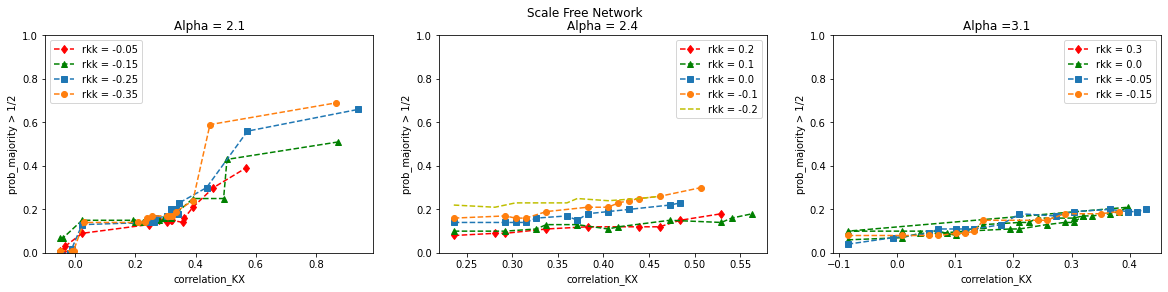

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Scale Free Network')
fig.set_size_inches(20, 4, forward=True)

ax1.plot(df1[df1['rkk'] == -0.05]['correlation_KX'], df1[df1['rkk'] == -0.05]['prob_majority'], 'rd--', label = 'rkk = -0.05')
ax1.plot(df1[df1['rkk'] == -0.15]['correlation_KX'], df1[df1['rkk'] == -0.15]['prob_majority'], 'g^--', label = 'rkk = -0.15')
ax1.plot(df1[df1['rkk'] == -0.25]['correlation_KX'], df1[df1['rkk'] == -0.25]['prob_majority'], 's--', label = 'rkk = -0.25')
ax1.plot(df1[df1['rkk'] == -0.35]['correlation_KX'], df1[df1['rkk'] == -0.35]['prob_majority'], 'o--', label = 'rkk = -0.35')
ax1.set_xlabel('correlation_KX')
ax1.set_ylabel('prob_majority > 1/2')
#ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_title("Alpha = 2.1")
ax1.legend()


#list_rkk_chosee = [0.2,0.10,0,-0.10,-0.20]
ax2.plot(df2[df2['rkk'] == 0.2]['correlation_KX'], df2[df2['rkk'] == 0.2]['prob_majority'], 'rd--', label = 'rkk = 0.2')
ax2.plot(df2[df2['rkk'] == 0.1]['correlation_KX'], df2[df2['rkk'] == 0.1]['prob_majority'], 'g^--', label = 'rkk = 0.1')
ax2.plot(df2[df2['rkk'] == -0.0]['correlation_KX'], df2[df2['rkk'] == -0.0]['prob_majority'], 's--', label = 'rkk = 0.0')
ax2.plot(df2[df2['rkk'] == -0.1]['correlation_KX'], df2[df2['rkk'] == -0.1]['prob_majority'], 'o--', label = 'rkk = -0.1')
ax2.plot(df2[df2['rkk'] == -0.2]['correlation_KX'], df2[df2['rkk'] == -0.2]['prob_majority'], 'y--', label = 'rkk = -0.2')
ax2.set_xlabel('correlation_KX')
ax2.set_ylabel('prob_majority > 1/2')
#ax2.set_xlim(0,0.6)
ax2.set_ylim(0,1)
ax2.set_title("Alpha = 2.4")
ax2.legend()


#list_rkk_chosee = [0.30,0,0,-0.05,-0.15]
ax3.plot(df3[df3['rkk'] == 0.3]['correlation_KX'], df3[df3['rkk'] == 0.3]['prob_majority'], 'rd--', label = 'rkk = 0.3')
ax3.plot(df3[df3['rkk'] == -0.0]['correlation_KX'], df3[df3['rkk'] == -0.0]['prob_majority'], 'g^--', label = 'rkk = 0.0')
ax3.plot(df3[df3['rkk'] == -0.05]['correlation_KX'], df3[df3['rkk'] == -0.05]['prob_majority'], 's--', label = 'rkk = -0.05')
ax3.plot(df3[df3['rkk'] == -0.15]['correlation_KX'], df3[df3['rkk'] == -0.15]['prob_majority'], 'o--', label = 'rkk = -0.15')
ax3.set_xlabel('correlation_KX')
ax3.set_ylabel('prob_majority > 1/2')
#ax3.set_xlim(0,0.6)
ax3.set_ylim(0,1)
ax3.set_title("Alpha =3.1")
ax3.legend()

plt.show()

### Erdos Renyi

In [ ]:
def avg_degree(G):
  a = 1
  total_degree = []
  for i in G.degree:
    total_degree.append(i[a])
  avg_degree = round(sum(total_degree) / G.number_of_nodes(),1)

  return avg_degree

In [ ]:
def prob_of_majority_er(G):
  neighbor_list = []
  prob_majority = []
  for node in G.nodes:
    #print("Node:", node)
    neighbor_list = []
    for neighbor in G.neighbors(node):
        #print("Neighbor Attr:", G.nodes[neighbor]["attr"])
        neighbor_list.append(G.nodes[neighbor]["attr"])

    pom = neighbor_list.count(1)/len(neighbor_list)
    prob_majority.append(pom)

  cont = 0
  for i in prob_majority:
    if i > 0.2:
      cont = cont +1
  
  prob_of_majority = cont/G.number_of_nodes()
  return prob_of_majority

In [ ]:
def erdos_renyi(nodes,prob_graph,degree,prob):
  a = 0
  while a != degree:
    G = nx.erdos_renyi_graph(nodes, prob_graph, seed=None, directed=False)
    a = avg_degree(G)
  P = prob
  for i in range(0,nx.number_of_nodes(G)):
    if random.random() < P:
      a = 1
    else:
      a = 0
    G.add_nodes_from([(i, {"attr":a})])
  return G

In [ ]:
prob_list = [0.05,0.1,0.2]
rkk_list = [1]
list_rkk_chosee = [0.1,0,-0.1]
df4 = pd.DataFrame()
df5 = pd.DataFrame()
df6 = pd.DataFrame()

G = erdos_renyi(100,0.052,5.2,0.2)

for u in prob_list:
  rkk = -1000
  while rkk < 0.1:
    graph = erdos_renyi(100,0.052,5.2,u)
    rkk = nx.degree_assortativity_coefficient(graph)



  for i in list_rkk_chosee:
    G =  graph.copy()
    cont = 0
    while cont == 0:
      G = nx.double_edge_swap(G, nswap=1, max_tries=10000, seed=None)
      #rkk = nx.degree_pearson_correlation_coefficient(G)
      rkk = nx.degree_assortativity_coefficient(G)

      lower = i - 0.005
      upper = i + 0.005
      if lower <= rkk <= upper:
        print("Probability = ", u)
        print("Dissortative measure:", round(rkk,2))
        cont = 1
      else:
        cont = 0

    
    list_rkk = [] #round(rkk,2)
    list_prob_maj = []
    list_correlation_KX = []

    inactive_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 0]
    for i in range(0,len(inactive_nodes)):
      active_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 1]
      inactive_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 0]

      degrees_list_active_nodes = degrees_active_nodes(G,'list')
      degrees_list_inactive_nodes = degrees_inactive_nodes(G,'list')

      random_pos = random.randrange(len(active_nodes))
      active_node_changed = active_nodes[random_pos]
      rnd_active_node_degree = degrees_list_active_nodes[random_pos]


      if rnd_active_node_degree < degrees_list_inactive_nodes[i]:
        #print("Active->Inactive Node:", active_node_changed, "Active Degree:", rnd_active_node_degree ,"Inactive->Active Node:", inactive_nodes[i],"Inactive Degree", degrees_list_inactive_nodes[i])
        nx.set_node_attributes(G, {inactive_nodes[i]:{'attr':1}})
        nx.set_node_attributes(G, {active_nodes[random_pos]:{'attr':0}})
        rkk = nx.degree_pearson_correlation_coefficient(G)
        prob_maj = prob_of_majority(G)
        correlation_KX = Pkx(u,G) 
        active_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 1]
        print("Active nodes", len(active_nodes), "rkk:", round(rkk,2), "Prob Majority:", prob_maj, "correlation_KX", correlation_KX)
        list_rkk.append(round(rkk,2)) #round(rkk,2)
        list_prob_maj.append(prob_maj)
        list_correlation_KX.append(correlation_KX)

    if u == 0.05:
      df_aux4 = pd.DataFrame()
      df_aux4['correlation_KX'] = list_correlation_KX
      df_aux4['prob_majority'] = list_prob_maj
      df_aux4['rkk'] = list_rkk
      df4 = pd.concat([df4, df_aux4], ignore_index=True, axis = 0)
    elif u == 0.1:
      df_aux5 = pd.DataFrame()
      df_aux5['correlation_KX'] = list_correlation_KX
      df_aux5['prob_majority'] = list_prob_maj
      df_aux5['rkk'] = list_rkk
      df5 = pd.concat([df5, df_aux5], ignore_index=True, axis = 0)
    elif u == 0.2:
      df_aux6 = pd.DataFrame()
      df_aux6['correlation_KX'] = list_correlation_KX
      df_aux6['prob_majority'] = list_prob_maj
      df_aux6['rkk'] = list_rkk
      df6 = pd.concat([df6, df_aux6], ignore_index=True, axis = 0)



Probability =  0.05
Dissortative measure: 0.1
Active nodes 5 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.060346123916592026
Active nodes 5 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.08658356909771903
Active nodes 5 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.12156682933922164
Active nodes 5 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.13031264439959728
Active nodes 5 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.13905845945997297
Active nodes 5 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.1565500895807243
Active nodes 5 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.16529590464109992
Active nodes 5 rkk: 0.1 Prob Majority: 0.01 correlation_KX 0.17404171970147556
Probability =  0.05
Dissortative measure: 0.0
Active nodes 5 rkk: 0.0 Prob Majority: 0.0 correlation_KX 0.060346123916592026
Active nodes 5 rkk: 0.0 Prob Majority: 0.0 correlation_KX 0.0953293841580947
Active nodes 5 rkk: 0.0 Prob Majority: 0.0 correlation_KX 0.13031264439959728
Active nodes 5 rkk: 0.0 Prob Majority: 0.0 correl

In [ ]:
prob_list = [0.05,0.1,0.2]
rkk_list = [1]
list_rkk_chosee = [0.1,0,-0.1]
df7 = pd.DataFrame()
df8 = pd.DataFrame()
df9 = pd.DataFrame()

G = erdos_renyi(100,0.025,2.5,0.2)

for u in prob_list:
  rkk = -1000
  while rkk < 0.1:
    graph = erdos_renyi(100,0.052,5.2,u)
    rkk = nx.degree_assortativity_coefficient(graph)



  for i in list_rkk_chosee:
    G =  graph.copy()
    cont = 0
    while cont == 0:
      G = nx.double_edge_swap(G, nswap=1, max_tries=10000, seed=None)
      #rkk = nx.degree_pearson_correlation_coefficient(G)
      rkk = nx.degree_assortativity_coefficient(G)

      lower = i - 0.005
      upper = i + 0.005
      if lower <= rkk <= upper:
        print("Probability = ", u)
        print("Dissortative measure:", round(rkk,2))
        cont = 1
      else:
        cont = 0

    
    list_rkk = [] #round(rkk,2)
    list_prob_maj = []
    list_correlation_KX = []

    inactive_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 0]
    for i in range(0,len(inactive_nodes)):
      active_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 1]
      inactive_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 0]

      degrees_list_active_nodes = degrees_active_nodes(G,'list')
      degrees_list_inactive_nodes = degrees_inactive_nodes(G,'list')

      random_pos = random.randrange(len(active_nodes))
      active_node_changed = active_nodes[random_pos]
      rnd_active_node_degree = degrees_list_active_nodes[random_pos]


      if rnd_active_node_degree < degrees_list_inactive_nodes[i]:
        #print("Active->Inactive Node:", active_node_changed, "Active Degree:", rnd_active_node_degree ,"Inactive->Active Node:", inactive_nodes[i],"Inactive Degree", degrees_list_inactive_nodes[i])
        nx.set_node_attributes(G, {inactive_nodes[i]:{'attr':1}})
        nx.set_node_attributes(G, {active_nodes[random_pos]:{'attr':0}})
        rkk = nx.degree_pearson_correlation_coefficient(G)
        prob_maj = prob_of_majority(G)
        correlation_KX = Pkx(u,G) 
        active_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 1]
        print("Active nodes", len(active_nodes), "rkk:", round(rkk,2), "Prob Majority:", prob_maj, "correlation_KX", correlation_KX)
        list_rkk.append(round(rkk,2)) #round(rkk,2)
        list_prob_maj.append(prob_maj)
        list_correlation_KX.append(correlation_KX)

    if u == 0.05:
      df_aux7 = pd.DataFrame()
      df_aux7['correlation_KX'] = list_correlation_KX
      df_aux7['prob_majority'] = list_prob_maj
      df_aux7['rkk'] = list_rkk
      df7 = pd.concat([df7, df_aux7], ignore_index=True, axis = 0)
    elif u == 0.1:
      df_aux8 = pd.DataFrame()
      df_aux8['correlation_KX'] = list_correlation_KX
      df_aux8['prob_majority'] = list_prob_maj
      df_aux8['rkk'] = list_rkk
      df8 = pd.concat([df8, df_aux8], ignore_index=True, axis = 0)
    elif u == 0.2:
      df_aux9 = pd.DataFrame()
      df_aux9['correlation_KX'] = list_correlation_KX
      df_aux9['prob_majority'] = list_prob_maj
      df_aux9['rkk'] = list_rkk
      df9 = pd.concat([df9, df_aux9], ignore_index=True, axis = 0)

Probability =  0.05
Dissortative measure: 0.1
Active nodes 4 rkk: 0.1 Prob Majority: 0.0 correlation_KX -0.07149387245459089
Active nodes 4 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.013617880467541135
Active nodes 4 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.025776702313559993
Active nodes 4 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.09872963338967315
Active nodes 4 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.15952374261976746
Active nodes 4 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.1716825644657863
Active nodes 4 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.20815903000384284
Active nodes 4 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.2203178518498617
Active nodes 4 rkk: 0.1 Prob Majority: 0.0 correlation_KX 0.24463549554189945
Probability =  0.05
Dissortative measure: 0.0
Active nodes 4 rkk: 0.0 Prob Majority: 0.0 correlation_KX -0.07149387245459089
Active nodes 4 rkk: 0.0 Prob Majority: 0.0 correlation_KX 0.0014590586215222751
Active nodes 4 rkk: 0.0 Prob Majority: 0.0 cor

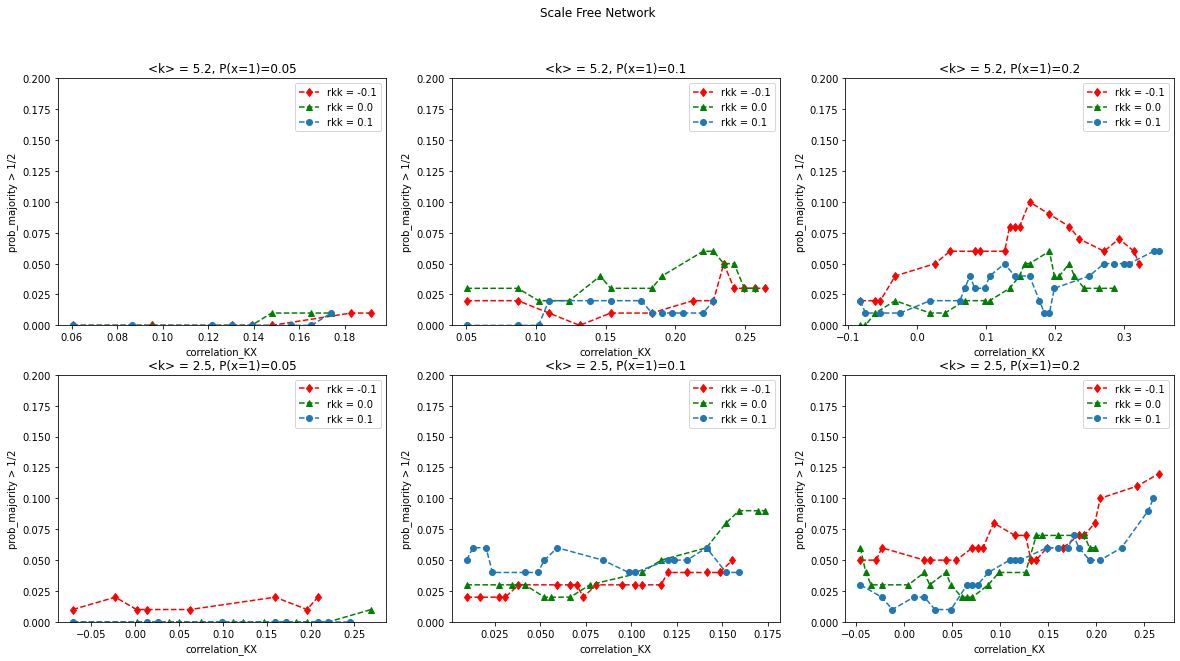

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.suptitle('Scale Free Network')
fig.set_size_inches(20, 10, forward=True)

ax1.plot(df4[df4['rkk'] == -0.1]['correlation_KX'], df4[df4['rkk'] == -0.1]['prob_majority'], 'rd--', label = 'rkk = -0.1')
ax1.plot(df4[df4['rkk'] == -0.0]['correlation_KX'], df4[df4['rkk'] == -0.0]['prob_majority'], 'g^--', label = 'rkk = 0.0')
ax1.plot(df4[df4['rkk'] == 0.1]['correlation_KX'], df4[df4['rkk'] == 0.1]['prob_majority'], 'o--', label = 'rkk = 0.1')
ax1.set_xlabel('correlation_KX')
ax1.set_ylabel('prob_majority > 1/2')
#ax1.set_xlim(0,1)
ax1.set_ylim(0,0.2)
ax1.set_title("<k> = 5.2, P(x=1)=0.05" )
ax1.legend()

ax2.plot(df5[df5['rkk'] == -0.1]['correlation_KX'], df5[df5['rkk'] == -0.1]['prob_majority'], 'rd--', label = 'rkk = -0.1')
ax2.plot(df5[df5['rkk'] == -0.0]['correlation_KX'], df5[df5['rkk'] == -0.0]['prob_majority'], 'g^--', label = 'rkk = 0.0')
ax2.plot(df5[df5['rkk'] == 0.1]['correlation_KX'], df5[df5['rkk'] == 0.1]['prob_majority'], 'o--', label = 'rkk = 0.1')
ax2.set_xlabel('correlation_KX')
ax2.set_ylabel('prob_majority > 1/2')
#ax2.set_xlim(0,1)
ax2.set_ylim(0,0.2)
ax2.set_title("<k> = 5.2, P(x=1)=0.1" )
ax2.legend()

ax3.plot(df6[df6['rkk'] == -0.1]['correlation_KX'], df6[df6['rkk'] == -0.1]['prob_majority'], 'rd--', label = 'rkk = -0.1')
ax3.plot(df6[df6['rkk'] == -0.0]['correlation_KX'], df6[df6['rkk'] == -0.0]['prob_majority'], 'g^--', label = 'rkk = 0.0')
ax3.plot(df6[df6['rkk'] == 0.1]['correlation_KX'], df6[df6['rkk'] == 0.1]['prob_majority'], 'o--', label = 'rkk = 0.1')
ax3.set_xlabel('correlation_KX')
ax3.set_ylabel('prob_majority > 1/2')
#ax3.set_xlim(0,1)
ax3.set_ylim(0,0.2)
ax3.set_title("<k> = 5.2, P(x=1)=0.2" )
ax3.legend()

ax4.plot(df7[df7['rkk'] == -0.1]['correlation_KX'], df7[df7['rkk'] == -0.1]['prob_majority'], 'rd--', label = 'rkk = -0.1')
ax4.plot(df7[df7['rkk'] == -0.0]['correlation_KX'], df7[df7['rkk'] == -0.0]['prob_majority'], 'g^--', label = 'rkk = 0.0')
ax4.plot(df7[df7['rkk'] == 0.1]['correlation_KX'], df7[df7['rkk'] == 0.1]['prob_majority'], 'o--', label = 'rkk = 0.1')
ax4.set_xlabel('correlation_KX')
ax4.set_ylabel('prob_majority > 1/2')
#ax4.set_xlim(0,1)
ax4.set_ylim(0,0.2)
ax4.set_title("<k> = 2.5, P(x=1)=0.05" )
ax4.legend()


ax5.plot(df8[df8['rkk'] == -0.1]['correlation_KX'], df8[df8['rkk'] == -0.1]['prob_majority'], 'rd--', label = 'rkk = -0.1')
ax5.plot(df8[df8['rkk'] == -0.0]['correlation_KX'], df8[df8['rkk'] == -0.0]['prob_majority'], 'g^--', label = 'rkk = 0.0')
ax5.plot(df8[df8['rkk'] == 0.1]['correlation_KX'], df8[df8['rkk'] == 0.1]['prob_majority'], 'o--', label = 'rkk = 0.1')
ax5.set_xlabel('correlation_KX')
ax5.set_ylabel('prob_majority > 1/2')
#ax5.set_xlim(0,1)
ax5.set_ylim(0,0.2)
ax5.set_title("<k> = 2.5, P(x=1)=0.1" )
ax5.legend()

ax6.plot(df9[df9['rkk'] == -0.1]['correlation_KX'], df9[df9['rkk'] == -0.1]['prob_majority'], 'rd--', label = 'rkk = -0.1')
ax6.plot(df9[df9['rkk'] == -0.0]['correlation_KX'], df9[df9['rkk'] == -0.0]['prob_majority'], 'g^--', label = 'rkk = 0.0')
ax6.plot(df9[df9['rkk'] == 0.1]['correlation_KX'], df9[df9['rkk'] == 0.1]['prob_majority'], 'o--', label = 'rkk = 0.1')
ax6.set_xlabel('correlation_KX')
ax6.set_ylabel('prob_majority > 1/2')
#ax6.set_xlim(0,1)
ax6.set_ylim(0,0.2)
ax6.set_title("<k> = 2.5, P(x=1)=0.2" )
ax6.legend()

plt.show()

# Part 2: Experiment Proposal

## Define Functions

In [8]:
def scale_free_network(nodes,exponent):
  attr = {0: 0, 1: 1}

  k_list = []
  pk_list = []
  z = powerlaw_sequence(nodes, exponent = exponent) #sequence
  z = [round(item) for item in z]
  verify = nx.is_graphical(z)

  while verify == False:
    z = powerlaw_sequence(nodes, exponent = exponent)
    z = [round(item) for item in z]
    verify = nx.is_graphical(z)

  seed = None

  G = nx.configuration_model(z, seed=seed)  # configuration model, seed for reproduciblity

  for i in range(0,nx.number_of_nodes(G)):
    G.add_nodes_from([(i, {"attr":0})])

  return G

In [9]:
def prob_of_majority(G):
  neighbor_list = []
  prob_majority = []
  for node in G.nodes:
    #print("Node:", node)
    neighbor_list = []
    for neighbor in G.neighbors(node):
        #print("Neighbor Attr:", G.nodes[neighbor]["attr"])
        neighbor_list.append(G.nodes[neighbor]["attr"])

    if len(neighbor_list) == 0:
      pom = 0
    else:
      pom = neighbor_list.count(1)/len(neighbor_list)
    prob_majority.append(pom)

  cont = 0
  for i in prob_majority:
    if i > 0.5:
      cont = cont +1

  prob_of_majority = cont/G.number_of_nodes()
  return prob_of_majority

## Proposal

To study the majority illusion, I propose the following steps:

1) Create a random network (for this example, we will use a scale-free network created with a power-law sequence with an exponent of 2.1). Note that the nodes will also have binary attributes (0 and 1). When creating the network, all nodes start with attribute 0.

2) Sort the nodes by degree, from the one with the highest degree to the one with the lowest.

3) Activate the nodes one by one, starting from the one with the highest degree to the one with the lowest.

4) Each time a new node is activated, calculate the number of nodes that see the majority of their neighbors (i.e., more than 50%) as activated over the total number of nodes.

5) Measure the percentage of activated nodes versus the percentage of nodes that see more activated neighbors than not.


In [10]:
G = scale_free_network(100,2.1)
active_nodes_list = []
prob_majority_list = []
marked = []
nodes_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)
f = 0
cont = -1
mark = 0
for f in range(0,50):
  cont = cont + 1
  for i in range(0,cont):
    #print(nodes_degree[i][0])
    G.add_nodes_from([(nodes_degree[i][0], {"attr":1})])
    active_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 1]

  prob_maj = prob_of_majority(G)
  active_nodes_perctg = cont/G.number_of_nodes()
  #print("Active Nodes:", active_nodes_perctg,"Prob of majority:", prob_maj)
  active_nodes_list.append(active_nodes_perctg)
  prob_majority_list.append(prob_maj)

  if (prob_maj > 0.5) and (mark == 0):
    mark = active_nodes_perctg

  for i in G.nodes():
    G.add_nodes_from([(nodes_degree[i][0], {"attr":0})])

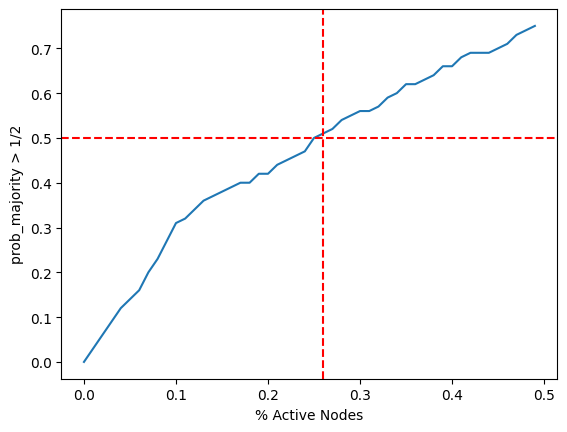

In [11]:
plt.plot(active_nodes_list, prob_majority_list)
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.axvline(x = mark, color = 'r', linestyle = '--')
plt.xlabel('% Active Nodes')
plt.ylabel('prob_majority > 1/2')
plt.show()

In [12]:
list_of_assortative = [0.1,0.05,-0.05,-0.1]

assort_list = []
rkk = -1000
while rkk < 0.1:
  graph = scale_free_network(100,2.1)
  rkk = nx.degree_assortativity_coefficient(graph)


for t in list_of_assortative:
  G =  graph.copy()
  cont = 0
  while cont == 0:
    G = nx.double_edge_swap(G, nswap=1, max_tries=10000, seed=None)
    rkk = nx.degree_assortativity_coefficient(G)

    lower = t - 0.005
    upper = t + 0.005
    if lower <= rkk <= upper:
      print("Dissortative measure:", round(rkk,2))
      cont = 1
    else:
      cont = 0

  active_nodes_list = []
  prob_majority_list = []
  marked = []
  nodes_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)
  f = 0
  cont = -1
  mark = 0
  for f in range(0,50):
    cont = cont + 1
    for i in range(0,cont):
      #print(nodes_degree[i][0])
      G.add_nodes_from([(nodes_degree[i][0], {"attr":1})])
      active_nodes = [n for n,v in G.nodes(data=True) if v['attr'] == 1]

    prob_maj = prob_of_majority(G)
    active_nodes_perctg = cont/G.number_of_nodes()
    print("Active Nodes:", active_nodes_perctg,"Prob of majority:", prob_maj)
    active_nodes_list.append(active_nodes_perctg)
    prob_majority_list.append(prob_maj)
    assort_list.append(t)

    if (prob_maj > 0.5) and (mark == 0):
      mark = active_nodes_perctg

    if t == 0.1:
      dfa = pd.DataFrame(
      {'active_nodes': active_nodes_list,
      'prob_maj': prob_majority_list
      })
      dfa['assort'] = 0.1
      dfa['mark'] = mark
    elif t == 0.05:
      dfb = pd.DataFrame(
      {'active_nodes': active_nodes_list,
      'prob_maj': prob_majority_list
      })
      dfb['assort'] = 0.05
      dfb['mark'] = mark
    elif t == -0.05:
      dfc = pd.DataFrame(
      {'active_nodes': active_nodes_list,
      'prob_maj': prob_majority_list
      })
      dfc['assort'] = -0.05
      dfc['mark'] = mark
    elif t == -0.1:
      dfd = pd.DataFrame(
      {'active_nodes': active_nodes_list,
      'prob_maj': prob_majority_list
      })
      dfd['assort'] = -0.1
      dfd['mark'] = mark


    for i in G.nodes():
      G.add_nodes_from([(nodes_degree[i][0], {"attr":0})])

  print(mark)

Dissortative measure: 0.1
Active Nodes: 0.0 Prob of majority: 0.0
Active Nodes: 0.01 Prob of majority: 0.05
Active Nodes: 0.02 Prob of majority: 0.08
Active Nodes: 0.03 Prob of majority: 0.1
Active Nodes: 0.04 Prob of majority: 0.12
Active Nodes: 0.05 Prob of majority: 0.13
Active Nodes: 0.06 Prob of majority: 0.14
Active Nodes: 0.07 Prob of majority: 0.14
Active Nodes: 0.08 Prob of majority: 0.16
Active Nodes: 0.09 Prob of majority: 0.19
Active Nodes: 0.1 Prob of majority: 0.22
Active Nodes: 0.11 Prob of majority: 0.24
Active Nodes: 0.12 Prob of majority: 0.28
Active Nodes: 0.13 Prob of majority: 0.3
Active Nodes: 0.14 Prob of majority: 0.34
Active Nodes: 0.15 Prob of majority: 0.35
Active Nodes: 0.16 Prob of majority: 0.38
Active Nodes: 0.17 Prob of majority: 0.4
Active Nodes: 0.18 Prob of majority: 0.43
Active Nodes: 0.19 Prob of majority: 0.47
Active Nodes: 0.2 Prob of majority: 0.5
Active Nodes: 0.21 Prob of majority: 0.53
Active Nodes: 0.22 Prob of majority: 0.54
Active Nodes: 0.

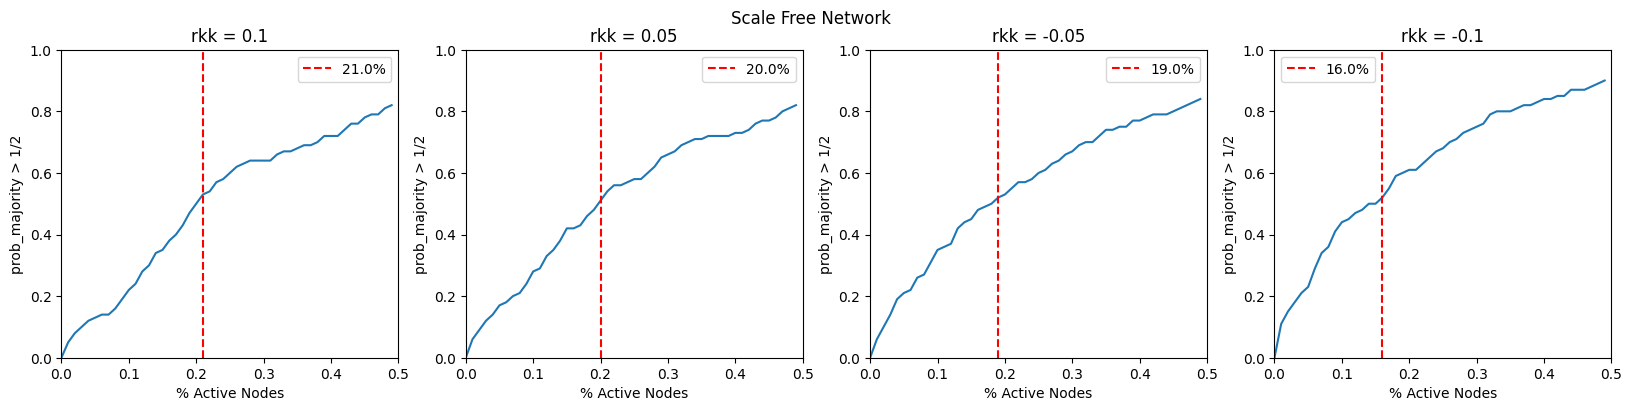

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Scale Free Network')
fig.set_size_inches(20, 4, forward=True)

ax1.plot(dfa['active_nodes'], dfa['prob_maj'])
ax1.axvline(x = dfa['mark'].min(), color = 'r', linestyle = '--', label = str(round(dfa['mark'].min()*100,1)) + '%' )
ax1.set_xlabel('% Active Nodes')
ax1.set_ylabel('prob_majority > 1/2')
ax1.set_xlim(0,0.5)
ax1.set_ylim(0,1)
ax1.set_title('rkk = ' + str(dfa['assort'].min()))
ax1.legend()


ax2.plot(dfb['active_nodes'], dfb['prob_maj'])
ax2.axvline(x = dfb['mark'].min(), color = 'r', linestyle = '--', label = str(round(dfb['mark'].min()*100,1)) + '%' )
ax2.set_xlabel('% Active Nodes')
ax2.set_ylabel('prob_majority > 1/2')
ax2.set_xlim(0,0.5)
ax2.set_ylim(0,1)
ax2.set_title('rkk = ' + str(dfb['assort'].min()))
ax2.legend()


ax3.plot(dfc['active_nodes'], dfc['prob_maj'])
ax3.axvline(x = dfc['mark'].min(), color = 'r', linestyle = '--', label = str(round(dfc['mark'].min()*100,1)) + '%' )
ax3.set_xlabel('% Active Nodes')
ax3.set_ylabel('prob_majority > 1/2')
ax3.set_xlim(0,0.5)
ax3.set_ylim(0,1)
ax3.set_title('rkk = ' + str(dfc['assort'].min()))
ax3.legend()


ax4.plot(dfd['active_nodes'], dfd['prob_maj'])
ax4.axvline(x = dfd['mark'].min(), color = 'r', linestyle = '--', label = str(round(dfd['mark'].min()*100,1)) + '%' )
ax4.set_xlabel('% Active Nodes')
ax4.set_ylabel('prob_majority > 1/2')
ax4.set_xlim(0,0.5)
ax4.set_ylim(0,1)
ax4.set_title('rkk = ' + str(dfd['assort'].min()))
ax4.legend()


plt.show()